# RawDataset

In [1]:
from repalette.datasets import RawDataset

In [2]:
raw_dataset = RawDataset()

In [3]:
(image, palette), raw_image = raw_dataset[0]

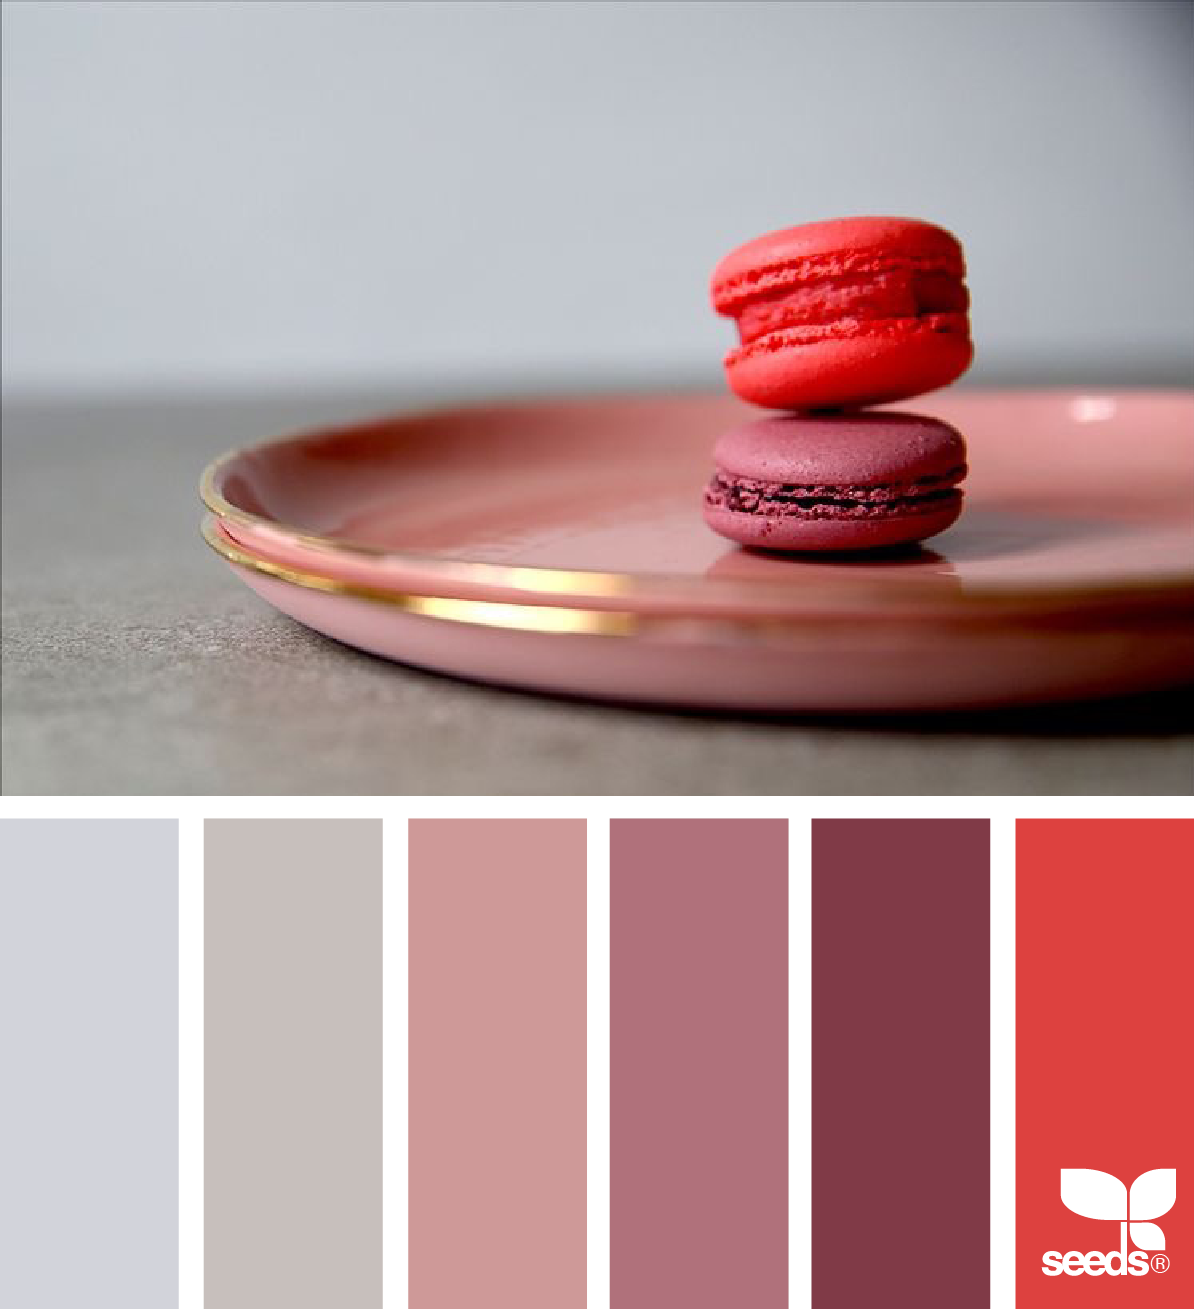

In [4]:
image

In [5]:
palette

['#DC413E', '#803A48', '#AF717B', '#CE9998', '#C7BFBC', '#D2D2DA']

In [6]:
raw_image.name

'5_3_ColorServe_sindstudio.png'

In [7]:
raw_image.path

'/home/dan/Projects/repalette/data/raw/5_3_ColorServe_sindstudio.png'

In [8]:
raw_image.url

'https://www.design-seeds.com/wp-content/uploads/2017/05/5_3_ColorServe_sindstudio.png'

In [9]:
raw_image.height

1309

In [10]:
raw_image.width

1194

In [11]:
raw_image.created_at

datetime.datetime(2020, 11, 9, 20, 15, 12, 763406)

In [12]:
len(raw_dataset)

2999

# RGBDataset

In [13]:
from repalette.datasets import RGBDataset

In [14]:
rgb_dataset = RGBDataset()

In [15]:
(image, palette), rgb_image = rgb_dataset[0]

In [16]:
image

array([[[187, 194, 200],
        [191, 198, 204],
        [191, 198, 204],
        ...,
        [ 83,  87,  98],
        [ 83,  87,  98],
        [ 88,  92, 102]],

       [[192, 199, 205],
        [196, 203, 209],
        [196, 203, 209],
        ...,
        [ 87,  91, 102],
        [ 87,  91, 102],
        [ 91,  95, 106]],

       [[192, 199, 205],
        [196, 203, 209],
        [196, 203, 209],
        ...,
        [ 87,  91, 102],
        [ 87,  91, 102],
        [ 91,  95, 106]],

       ...,

       [[166, 167, 161],
        [167, 168, 162],
        [167, 168, 162],
        ...,
        [107, 100,  94],
        [107, 100,  94],
        [104,  97,  91]],

       [[166, 167, 161],
        [167, 168, 162],
        [167, 168, 162],
        ...,
        [107, 100,  94],
        [107, 100,  94],
        [104,  97,  91]],

       [[166, 167, 161],
        [167, 168, 162],
        [167, 168, 162],
        ...,
        [107, 100,  94],
        [107, 100,  94],
        [104,  97,  91]]

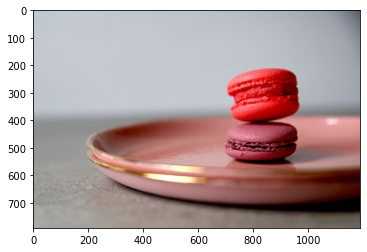

In [17]:
from matplotlib import pyplot as plt

plt.imshow(image)

In [18]:
palette

array([[[210, 210, 218],
        [199, 191, 188],
        [206, 153, 152],
        [175, 113, 123],
        [128,  58,  72],
        [220,  65,  62]]], dtype=uint8)

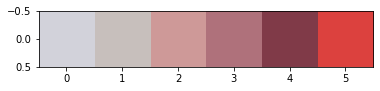

In [19]:
plt.imshow(palette)

In [20]:
rgb_image.name

'5_3_ColorServe_sindstudio.png'

In [21]:
rgb_image.path

'/home/dan/Projects/repalette/data/rgb/5_3_ColorServe_sindstudio.png'

In [22]:
rgb_image.url

'https://www.design-seeds.com/wp-content/uploads/2017/05/5_3_ColorServe_sindstudio.png'

In [23]:
rgb_image.height

1309

In [24]:
rgb_image.width

1194

In [25]:
rgb_image.created_at

datetime.datetime(2020, 11, 10, 19, 22, 59, 645842)

In [26]:
len(rgb_dataset)

2994